In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [5]:
from wikiframe import Extractor
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'wikiframe'

In [ ]:
from transform import one_hot_transform, normalize, dropper_na_row

In [ ]:
extractor = Extractor('data')
df_dict = extractor.extract_from_csv()

In [ ]:
train = df_dict['house_train_raw']
test = df_dict['houses_test_raw']
df_all = pd.concat([train,test])
df_all.shape

(2919, 81)

<AxesSubplot:>

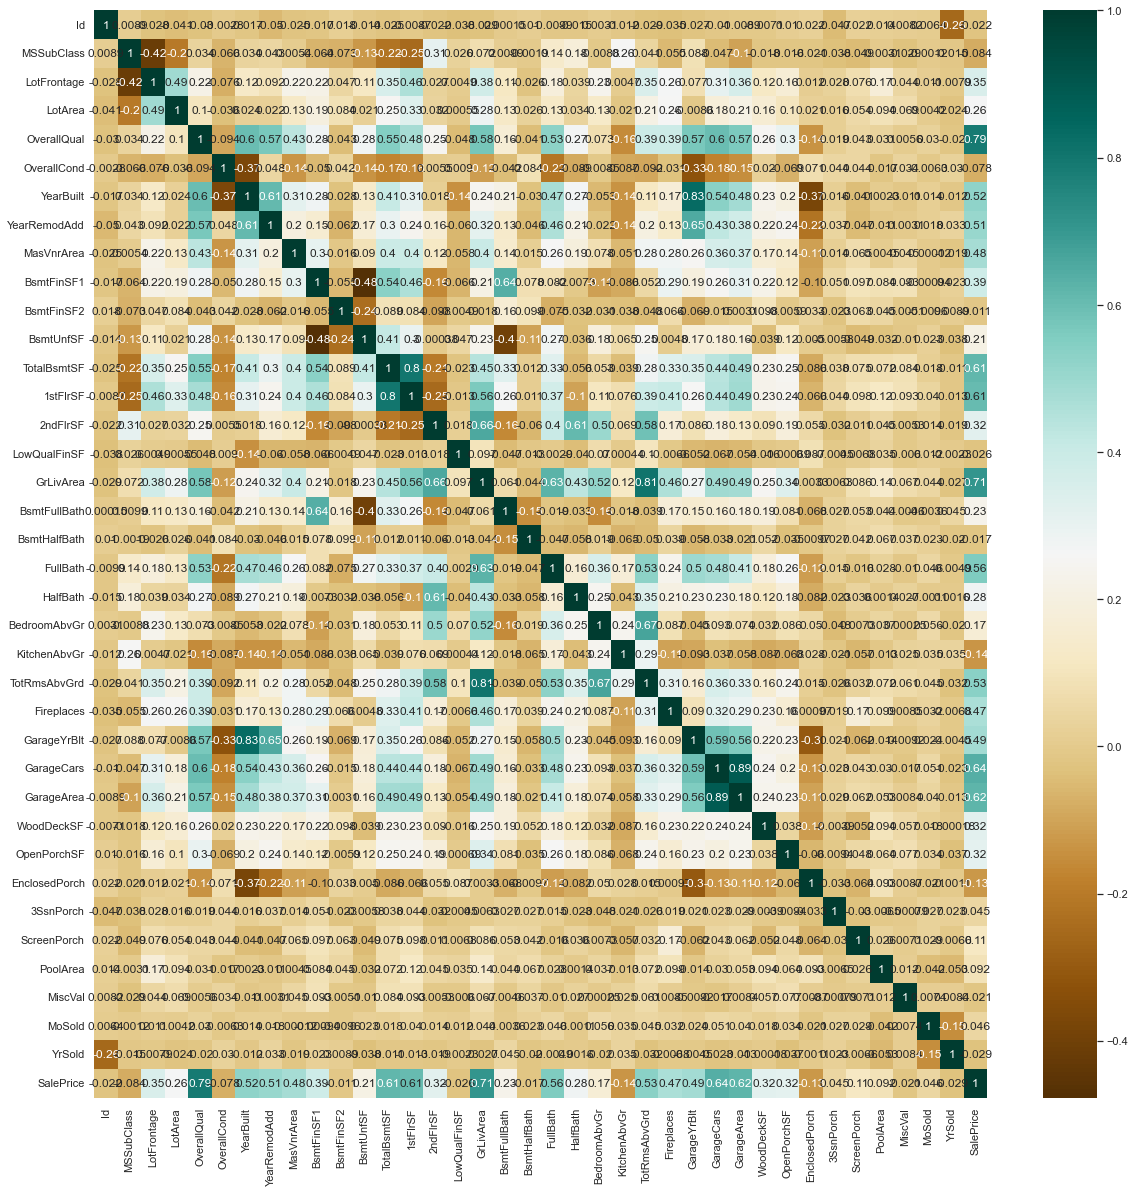

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df_all.corr(), annot=True, cmap='BrBG', linecolor='white', cbar=True)


In [ ]:
train = df_all.iloc[:1460,:]
test = df_all.iloc[1460:,:]
#Se eliminan las filas con valores nulos
#train = dropper_na_row(train, 'SalePrice')
X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

In [ ]:
ohot = OneHotEncoder(sparse=False)

In [ ]:
ob = X.dtypes == 'object'
index = ob[ob].index


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(),index), 
    (StandardScaler(),index),
    remainder='passthrough'
)

In [ ]:
pd.DataFrame.sparse.from_spmatrix(column_trans.fit_transform(X))

ValueError: could not convert string to float: 'RL'

In [ ]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet(alpha=0.00041320124001153346, l1_ratio=0.3, fit_intercept=True, normalize=True)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(column_trans, elastic_net)

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(pipe,X,y,cv=5, scoring='accuracy').mean()

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Python310\lib\site-packages\joblib\memory.py", line 349, in __call__
 

nan

In [ ]:
df_all = one_hot_transform(df_all)

In [ ]:
df_all = normalize(df_all)

In [ ]:
#Separando los datos como teníamos antes
train = df_all.iloc[:1460,:]
test = df_all.iloc[1460:,:]

In [ ]:
train = dropper_na_row(train, 'SalePrice')


In [ ]:
df_all

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,-1.731458,0.067331,-0.184481,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.523129,0.580807,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.730271,-0.873616,0.458190,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.569991,1.177910,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,-1.729084,0.067331,-0.055946,0.137197,0.646183,-0.507284,0.980221,0.848965,0.333506,0.097856,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-1.727897,0.302568,-0.398704,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.569991,-0.494856,...,-0.052423,-0.298629,-0.049029,0.395018,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,-1.726711,0.067331,0.629569,0.518903,1.355551,-0.507284,0.947203,0.753229,1.382009,0.468851,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.004747,0.067331,-0.313015,-0.285470,-0.063185,-0.507284,0.914184,0.753229,-0.569991,-0.969026,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,-0.003560,-0.873616,0.672414,0.381311,-0.063185,0.391237,0.220801,0.178812,0.093689,0.765207,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.002373,0.302568,-0.141636,-0.142806,0.646183,3.086800,-1.000876,1.040437,-0.569991,-0.365338,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,-0.001187,-0.873616,-0.055946,-0.057207,-0.772552,0.391237,-0.703711,0.561757,-0.569991,-0.861460,...,-0.052423,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
